# Laboratory session for the course of Image Analysis
## BE 2. Fourier domain and image filtering
### Duration: 2h


**Instructions:** Submit a **report** for each group (up to two people per group) of the session in a single **notebook**, name it **LabX_Name1_Name2**, with X the number of the lab session and **Name1,2** your surnames. Upload the notebook to the folder on **Chamilo**, corresponding to your supervisor associated to this session. We allow either the `ipynb` or `pdf` file format (`File -> Save and export notebook as -> pdf through LaTeX`). If you were already assigned a personal repository for your group, you can also upload this content there through **git**.

**Deadline submission:** The material report should be submitted within a week from the lab work.

**Objectives** The objectives of this lab work are:
- to observe some properties of the 2-D Discrete Fourier Transform (DFT)
- to use the 2D DFT for filtering

In [1]:
%%capture

%matplotlib inline
%pip install -r requirements.txt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import scipy.ndimage

images_folder = "images/"

## Fourier analysis of images 

The analysis in the Fourier domain allows to detect some information on the data, such as periodic patterns, edges, symmetries, that would be difficult to detect in the original domain.

- We provide a custom function `visualize_fourier` to show the amplitude and phase of a DFT.
- As an example, we apply function to two toy images of size $128 \times 128$:
    - A **grid** composed of black and white bars, of a given width `width`
    - A **disk**, centered in the center of the image, with a given radius `radius`

In [3]:
def visualize_fourier(img_in):
    """Visualizes the amplitude and phase of the Fourier transform of an image"""
    fourier_transform = np.fft.fftshift(np.fft.fft2(img_in))
    _, ax = plt.subplots(1,3, figsize=(25, 15))
    ax[0].imshow(img_in, cmap="gray")
    ax[0].set_title("Original image")
    ax[0].set_xlabel("Horizontal coordinates")
    ax[0].set_ylabel("Vertical coordinates")
    ax[1].imshow(np.log(1 + np.abs(fourier_transform)), extent=(-1/2, 1/2, 1/2, -1/2))
    ax[1].set_title("Amplitude in dB")
    ax[1].set_xlabel("Horizontal spatial digital frequency")
    ax[1].set_ylabel("Vertical spatial digital frequency")
    ax[2].imshow(np.angle(fourier_transform), extent=(-1/2, 1/2, 1/2, -1/2))
    ax[2].set_title("Phase angle")
    ax[2].set_xlabel("Horizontal spatial digital frequency")
    ax[2].set_ylabel("Vertical spatial digital frequency")
    plt.show()

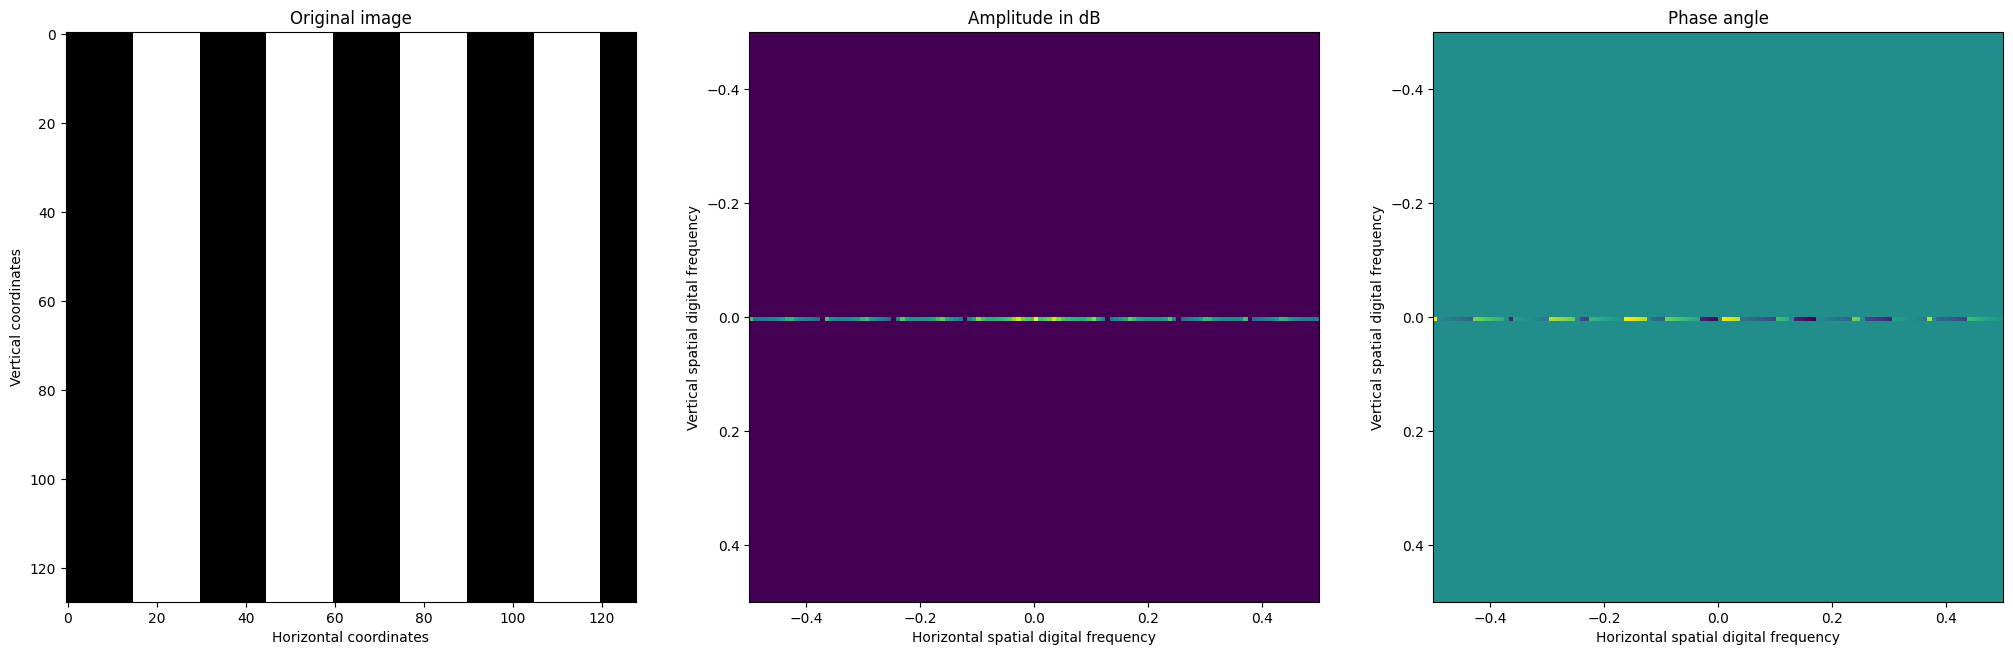

In [4]:
# Example: Creating a grid
nb_rows, nb_cols = 128, 128
width = 15

bw_strips = int(np.ceil(nb_cols/(2*width)))  # Calculates the amount of black/white strips
img_grid = np.concatenate((np.zeros((nb_rows, width)), np.ones((nb_rows, width))), axis=1)  # Generates the first strip
img_grid = np.tile(img_grid, (1, bw_strips))  # Replicates the vertical strips
img_grid = img_grid[:, :nb_cols]  # Crops the image


visualize_fourier(img_grid) 

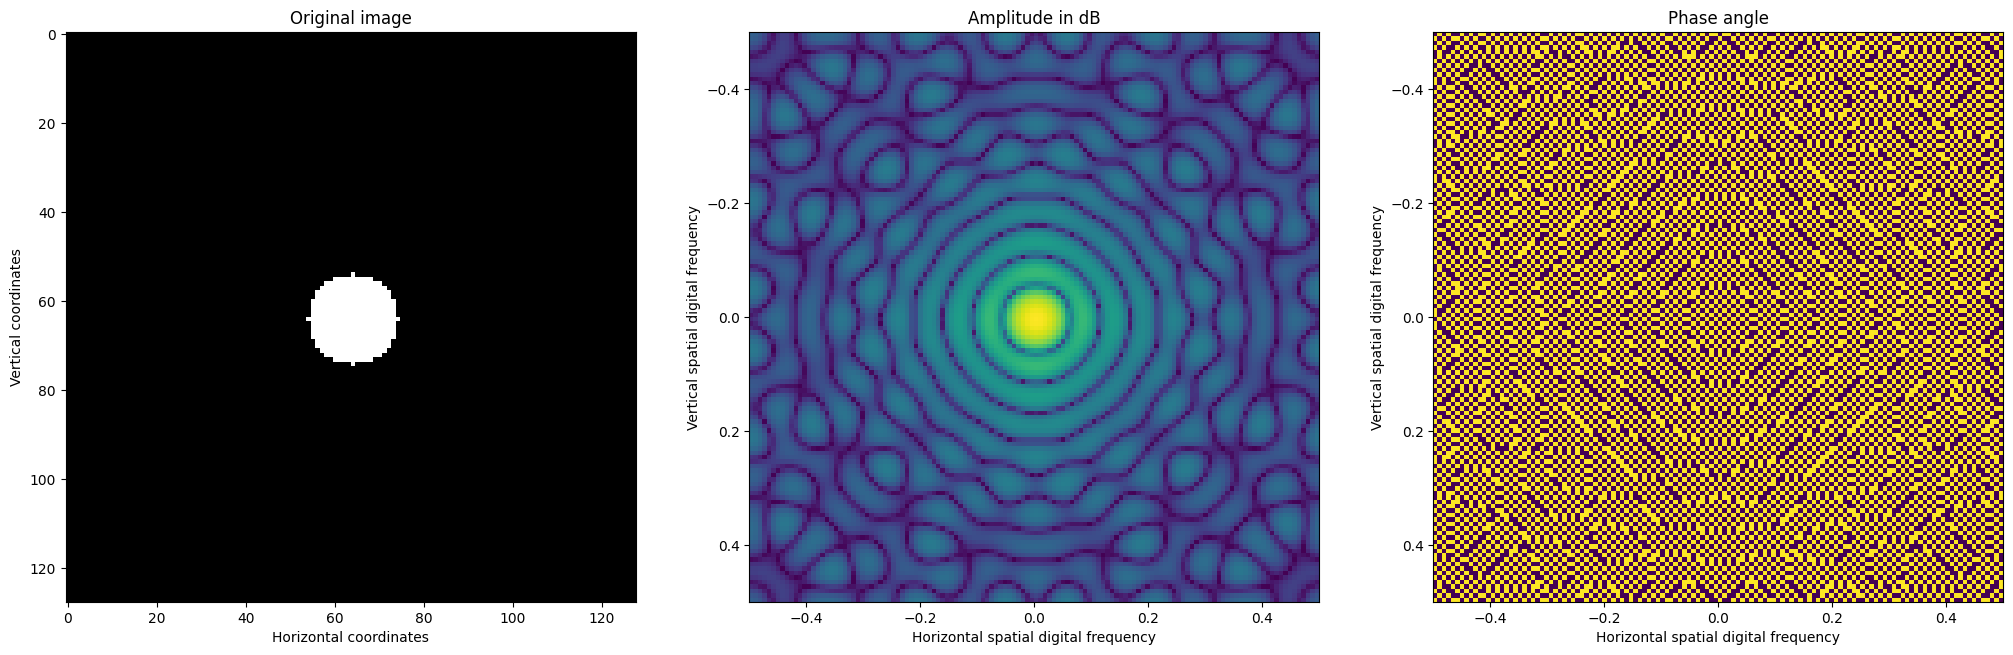

In [5]:
# Example: Creating a disk
nb_rows, nb_cols = 128, 128
radius = 10

y, x = np.ogrid[-nb_rows/2:nb_rows/2, -nb_cols/2:nb_cols/2]  # Generates the coordinate system
img_disk = x**2+y**2 <= radius**2  # Checks the condition of distance from the origin
img_disk = img_disk.astype(float)  # Transforms bool into float

visualize_fourier(img_disk)


### __Laboratory activity__

**Exercise:**
- Study the effect on the DFT resulting from a modification of the parameters `width` and `radius`
    - What happens if the image size is a multiple of `width`
    - What is the effect of increasing the `radius`
- What is the imaginary part of the Fourier transform for the disk?

In [6]:
# To do

### __Laboratory activity__
**Exercise:**
- Repeat the operations with a selection of the textures images contained in your image folder (`texture1.pgm` to `texture10.pgm`)

**Questions:**
- Explain why the Fourier spectrum is well suited to describe the directionality of the textures.
- Why does the amplitude of the Fourier transform show some bright spots?

In [7]:
# To do

### __Laboratory activity__

**Exercise:**
- Repeat the exercise with the images `camera`, `Lena` and `ville` included in the image folder. (Warning: the ville image has 3 channels and on 16 bits).

**Questions:**
    - Which spatial regions of the image are respectively associated to the low and high frequency components of the DFT?
    - Some radial rays appear in the amplitude of the DFT of the image, can you describe what are they caused by, with respect to their orientation? 
    - In particular, what do the vertical and horizontal ray represent in the amplitude term?

In [8]:
# To do

## Filtering in frequency domain

The filtering operation in the frequency domain is usually simplified, as it is possible to apply the filters by a simple elementwise multiplication, instead of a convolution.

In this section, we want to perform some filtering operations in the Fourier domain over the `Lena` image. 
In particular we show below the result of processing the image with an **ideal isotropic lowpass filter**. This filter response is a flat disk in the Fourier domain, whose radius denotes its cutoff frequency.

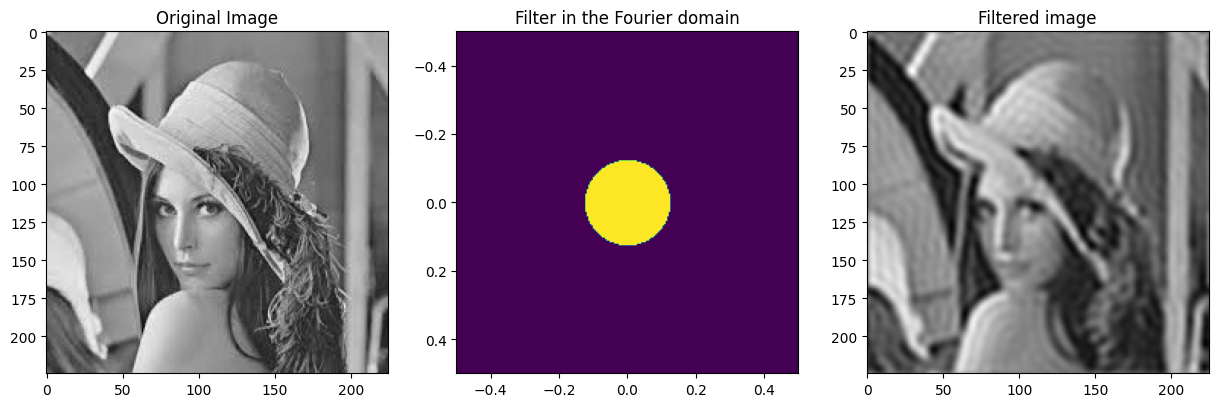

In [9]:
# Example: Low pass with an ideal lowpass filter

img_lena = skimage.io.imread(images_folder + 'Lena.tif')
nb_rows, nb_cols = img_lena.shape

# Creation of an ideal isotropic lowpass filter
cutoff_frequency = 1/8
radius = nb_rows*cutoff_frequency
y,x = np.ogrid[-nb_rows/2: nb_rows/2, -nb_cols/2: nb_cols/2] 
filter_ideal_lp = x**2+y**2 <= radius**2 
filter_ideal_lp = filter_ideal_lp.astype(float) 

# Filtering in the Fourier domain is a simple elementwise multiplication
img_lena_fft = np.fft.fftshift(np.fft.fft2(img_lena))
img_lena_filtered_fft = img_lena_fft*filter_ideal_lp
img_lena_filtered_lp = np.fft.ifft2(img_lena_filtered_fft) # Inverse transformation back to the spatial domain


_, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img_lena, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(filter_ideal_lp, extent=(-1/2, 1/2, 1/2, -1/2))
ax[1].set_title("Filter in the Fourier domain")
ax[2].imshow(np.abs(img_lena_filtered_lp), cmap="gray")
ax[2].set_title("Filtered image")

plt.show()

### _Laboratory activity_

**Exercise:**
- Repeat the operation with an **ideal isotropic high-pass filter**.
- Explore different cutoff frequencies for both the lowpass and highpass filter

**Question:**
- Comment the results. 
- Specifically, what are the distorsions in the ideal lowpass filtered image caused by?

In [10]:
# To do

### _Laboratory activity_
- Now perform the same operation with a **Butterworth lowpass filter of order 8**.
    - Note: For a given cutoff frequency $f_c$, the amplitude $G(f)$ of the Butterworth filter is defined as: 
       $$G(f)=\frac{1}{\sqrt{1+\left(\frac{f}{f_c}\right)^{2 N_o}}}$$ 
    - where $f$ is the digital frequency and $N_o$ is the order of the filter  

**Question:**
- What are the differences in the result obtained with the ideal and the Butterworth low-pass filter?

In [11]:
# To do

### Equivalence with convolution in spatial domain

In this section we want to apply a $4 \times 4$ mean filter to the image `ville` and verify that we obtain the same result applying it both in the spatial and spectral domain.

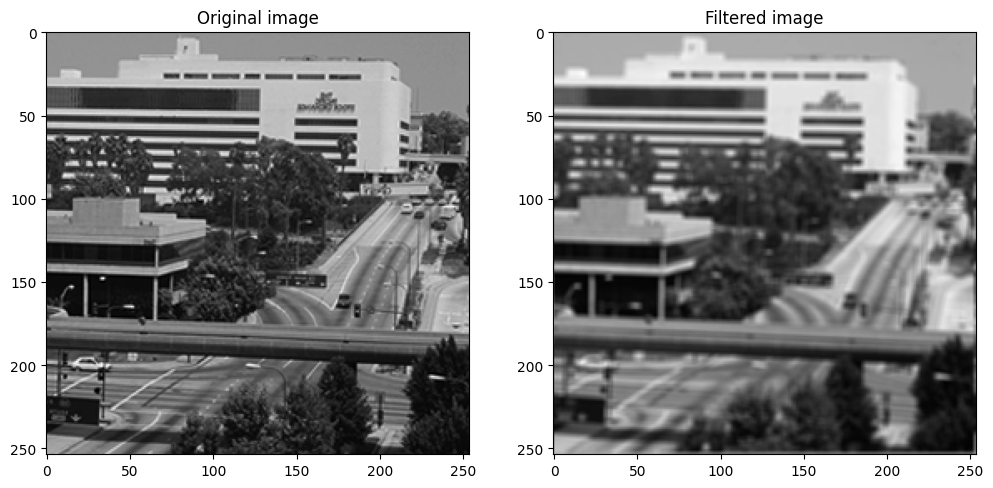

In [12]:
img_ville = skimage.io.imread(images_folder + 'ville.tif', plugin='pil')[:,:,0]

filter_space = np.ones((4,4)) / 16

img_ville_filtered = scipy.ndimage.convolve(img_ville, filter_space, mode="wrap") # Wrap allows to make the image periodic

_, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(img_ville, cmap='gray')
ax[0].set_title("Original image")
ax[1].imshow(img_ville_filtered, cmap='gray')
ax[1].set_title("Filtered image")

plt.show()

### _Laboratory activity_

**Exercise:**
- Perform the equivalent operation in frequency domain:
    - compute the DFT of the image and the DFT of the mask (appropriately extended with zeros).
        - Hint: be careful with the location of the origin.
    - filter the image in the Fourier domain
    - compute the IDFT to recover the original image

In [13]:
# To do

### _Laboratory activity_

**Exercise:**
- Calculate the root mean square error (RMSE) between the two ways you have performed this operation
- **Optional:** Try to fix your operations to make the RMSE as small as possible

In [14]:
# To do